In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
import keras 
from keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Dropout
from keras.models import Sequential

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
DIRECTORY = 'chest_xray'
FOLDERS = ['test', 'train', 'val']

CLASS = ['NORMAL','EFFECTED']

In [3]:
test_data = []
train_data = []
val_data = []

for folder in FOLDERS:
    folder_path = os.path.join(DIRECTORY, folder)
    for classification in CLASS:
        image_path = os.path.join(folder_path, classification)
        for image in os.listdir(image_path):
            try:
                image_url = os.path.join(image_path,image)
                print(image_url)
                arr = cv2.imread(image_url)
                arr = cv2.resize(arr, (100, 100))
                label = CLASS.index(classification)
                if folder == 'train':
                    train_data.append([arr, label])
                elif folder == 'test':
                    test_data.append([arr, label])
                else:
                    val_data.append([arr, label])
            except Exception as e:
                print(e)

chest_xray\test\NORMAL\IM-NORMAL (1).jpeg
chest_xray\test\NORMAL\IM-NORMAL (10).jpeg
chest_xray\test\NORMAL\IM-NORMAL (100).jpeg
chest_xray\test\NORMAL\IM-NORMAL (101).jpeg
chest_xray\test\NORMAL\IM-NORMAL (102).jpeg
chest_xray\test\NORMAL\IM-NORMAL (103).jpeg
chest_xray\test\NORMAL\IM-NORMAL (104).jpeg
chest_xray\test\NORMAL\IM-NORMAL (105).jpeg
chest_xray\test\NORMAL\IM-NORMAL (106).jpeg
chest_xray\test\NORMAL\IM-NORMAL (107).jpeg
chest_xray\test\NORMAL\IM-NORMAL (108).jpeg
chest_xray\test\NORMAL\IM-NORMAL (109).jpeg
chest_xray\test\NORMAL\IM-NORMAL (11).jpeg
chest_xray\test\NORMAL\IM-NORMAL (110).jpeg
chest_xray\test\NORMAL\IM-NORMAL (111).jpeg
chest_xray\test\NORMAL\IM-NORMAL (112).jpeg
chest_xray\test\NORMAL\IM-NORMAL (113).jpeg
chest_xray\test\NORMAL\IM-NORMAL (114).jpeg
chest_xray\test\NORMAL\IM-NORMAL (115).jpeg
chest_xray\test\NORMAL\IM-NORMAL (116).jpeg
chest_xray\test\NORMAL\IM-NORMAL (117).jpeg
chest_xray\test\NORMAL\IM-NORMAL (118).jpeg
chest_xray\test\NORMAL\IM-NORMAL (11

chest_xray\test\NORMAL\IM-NORMAL (59).jpeg
chest_xray\test\NORMAL\IM-NORMAL (6).jpeg
chest_xray\test\NORMAL\IM-NORMAL (60).jpeg
chest_xray\test\NORMAL\IM-NORMAL (61).jpeg
chest_xray\test\NORMAL\IM-NORMAL (62).jpeg
chest_xray\test\NORMAL\IM-NORMAL (63).jpeg
chest_xray\test\NORMAL\IM-NORMAL (64).jpeg
chest_xray\test\NORMAL\IM-NORMAL (65).jpeg
chest_xray\test\NORMAL\IM-NORMAL (66).jpeg
chest_xray\test\NORMAL\IM-NORMAL (67).jpeg
chest_xray\test\NORMAL\IM-NORMAL (68).jpeg
chest_xray\test\NORMAL\IM-NORMAL (69).jpeg
chest_xray\test\NORMAL\IM-NORMAL (7).jpeg
chest_xray\test\NORMAL\IM-NORMAL (70).jpeg
chest_xray\test\NORMAL\IM-NORMAL (71).jpeg
chest_xray\test\NORMAL\IM-NORMAL (72).jpeg
chest_xray\test\NORMAL\IM-NORMAL (73).jpeg
chest_xray\test\NORMAL\IM-NORMAL (74).jpeg
chest_xray\test\NORMAL\IM-NORMAL (75).jpeg
chest_xray\test\NORMAL\IM-NORMAL (76).jpeg
chest_xray\test\NORMAL\IM-NORMAL (77).jpeg
chest_xray\test\NORMAL\IM-NORMAL (78).jpeg
chest_xray\test\NORMAL\IM-NORMAL (79).jpeg
chest_xray\te

chest_xray\test\EFFECTED\IM-EFFECTED (227).jpeg
chest_xray\test\EFFECTED\IM-EFFECTED (228).jpeg
chest_xray\test\EFFECTED\IM-EFFECTED (229).jpeg
chest_xray\test\EFFECTED\IM-EFFECTED (23).jpeg
chest_xray\test\EFFECTED\IM-EFFECTED (230).jpeg
chest_xray\test\EFFECTED\IM-EFFECTED (231).jpeg
chest_xray\test\EFFECTED\IM-EFFECTED (232).jpeg
chest_xray\test\EFFECTED\IM-EFFECTED (233).jpeg
chest_xray\test\EFFECTED\IM-EFFECTED (234).jpeg
chest_xray\test\EFFECTED\IM-EFFECTED (235).jpeg
chest_xray\test\EFFECTED\IM-EFFECTED (236).jpeg
chest_xray\test\EFFECTED\IM-EFFECTED (237).jpeg
chest_xray\test\EFFECTED\IM-EFFECTED (238).jpeg
chest_xray\test\EFFECTED\IM-EFFECTED (239).jpeg
chest_xray\test\EFFECTED\IM-EFFECTED (24).jpeg
chest_xray\test\EFFECTED\IM-EFFECTED (240).jpeg
chest_xray\test\EFFECTED\IM-EFFECTED (241).jpeg
chest_xray\test\EFFECTED\IM-EFFECTED (242).jpeg
chest_xray\test\EFFECTED\IM-EFFECTED (243).jpeg
chest_xray\test\EFFECTED\IM-EFFECTED (244).jpeg
chest_xray\test\EFFECTED\IM-EFFECTED (245)

chest_xray\test\EFFECTED\IM-EFFECTED (390).jpeg
chest_xray\test\EFFECTED\IM-EFFECTED (4).jpeg
chest_xray\test\EFFECTED\IM-EFFECTED (40).jpeg
chest_xray\test\EFFECTED\IM-EFFECTED (41).jpeg
chest_xray\test\EFFECTED\IM-EFFECTED (42).jpeg
chest_xray\test\EFFECTED\IM-EFFECTED (43).jpeg
chest_xray\test\EFFECTED\IM-EFFECTED (44).jpeg
chest_xray\test\EFFECTED\IM-EFFECTED (45).jpeg
chest_xray\test\EFFECTED\IM-EFFECTED (46).jpeg
chest_xray\test\EFFECTED\IM-EFFECTED (47).jpeg
chest_xray\test\EFFECTED\IM-EFFECTED (48).jpeg
chest_xray\test\EFFECTED\IM-EFFECTED (49).jpeg
chest_xray\test\EFFECTED\IM-EFFECTED (5).jpeg
chest_xray\test\EFFECTED\IM-EFFECTED (50).jpeg
chest_xray\test\EFFECTED\IM-EFFECTED (51).jpeg
chest_xray\test\EFFECTED\IM-EFFECTED (52).jpeg
chest_xray\test\EFFECTED\IM-EFFECTED (53).jpeg
chest_xray\test\EFFECTED\IM-EFFECTED (54).jpeg
chest_xray\test\EFFECTED\IM-EFFECTED (55).jpeg
chest_xray\test\EFFECTED\IM-EFFECTED (56).jpeg
chest_xray\test\EFFECTED\IM-EFFECTED (57).jpeg
chest_xray\tes

chest_xray\train\NORMAL\IM-NORMAL (1101).jpeg
chest_xray\train\NORMAL\IM-NORMAL (1102).jpeg
chest_xray\train\NORMAL\IM-NORMAL (1103).jpeg
chest_xray\train\NORMAL\IM-NORMAL (1104).jpeg
chest_xray\train\NORMAL\IM-NORMAL (1105).jpeg
chest_xray\train\NORMAL\IM-NORMAL (1106).jpeg
chest_xray\train\NORMAL\IM-NORMAL (1107).jpeg
chest_xray\train\NORMAL\IM-NORMAL (1108).jpeg
chest_xray\train\NORMAL\IM-NORMAL (1109).jpeg
chest_xray\train\NORMAL\IM-NORMAL (111).jpeg
chest_xray\train\NORMAL\IM-NORMAL (1110).jpeg
chest_xray\train\NORMAL\IM-NORMAL (1111).jpeg
chest_xray\train\NORMAL\IM-NORMAL (1112).jpeg
chest_xray\train\NORMAL\IM-NORMAL (1113).jpeg
chest_xray\train\NORMAL\IM-NORMAL (1114).jpeg
chest_xray\train\NORMAL\IM-NORMAL (1115).jpeg
chest_xray\train\NORMAL\IM-NORMAL (1116).jpeg
chest_xray\train\NORMAL\IM-NORMAL (1117).jpeg
chest_xray\train\NORMAL\IM-NORMAL (1118).jpeg
chest_xray\train\NORMAL\IM-NORMAL (1119).jpeg
chest_xray\train\NORMAL\IM-NORMAL (112).jpeg
chest_xray\train\NORMAL\IM-NORMAL (1

chest_xray\train\NORMAL\IM-NORMAL (1266).jpeg
chest_xray\train\NORMAL\IM-NORMAL (1267).jpeg
chest_xray\train\NORMAL\IM-NORMAL (1268).jpeg
chest_xray\train\NORMAL\IM-NORMAL (1269).jpeg
chest_xray\train\NORMAL\IM-NORMAL (127).jpeg
chest_xray\train\NORMAL\IM-NORMAL (1270).jpeg
chest_xray\train\NORMAL\IM-NORMAL (1271).jpeg
chest_xray\train\NORMAL\IM-NORMAL (1272).jpeg
chest_xray\train\NORMAL\IM-NORMAL (1273).jpeg
chest_xray\train\NORMAL\IM-NORMAL (1274).jpeg
chest_xray\train\NORMAL\IM-NORMAL (1275).jpeg
chest_xray\train\NORMAL\IM-NORMAL (1276).jpeg
chest_xray\train\NORMAL\IM-NORMAL (1277).jpeg
chest_xray\train\NORMAL\IM-NORMAL (1278).jpeg
chest_xray\train\NORMAL\IM-NORMAL (1279).jpeg
chest_xray\train\NORMAL\IM-NORMAL (128).jpeg
chest_xray\train\NORMAL\IM-NORMAL (1280).jpeg
chest_xray\train\NORMAL\IM-NORMAL (1281).jpeg
chest_xray\train\NORMAL\IM-NORMAL (1282).jpeg
chest_xray\train\NORMAL\IM-NORMAL (1283).jpeg
chest_xray\train\NORMAL\IM-NORMAL (1284).jpeg
chest_xray\train\NORMAL\IM-NORMAL (1

chest_xray\train\NORMAL\IM-NORMAL (223).jpeg
chest_xray\train\NORMAL\IM-NORMAL (224).jpeg
chest_xray\train\NORMAL\IM-NORMAL (225).jpeg
chest_xray\train\NORMAL\IM-NORMAL (226).jpeg
chest_xray\train\NORMAL\IM-NORMAL (227).jpeg
chest_xray\train\NORMAL\IM-NORMAL (228).jpeg
chest_xray\train\NORMAL\IM-NORMAL (229).jpeg
chest_xray\train\NORMAL\IM-NORMAL (23).jpeg
chest_xray\train\NORMAL\IM-NORMAL (230).jpeg
chest_xray\train\NORMAL\IM-NORMAL (231).jpeg
chest_xray\train\NORMAL\IM-NORMAL (232).jpeg
chest_xray\train\NORMAL\IM-NORMAL (233).jpeg
chest_xray\train\NORMAL\IM-NORMAL (234).jpeg
chest_xray\train\NORMAL\IM-NORMAL (235).jpeg
chest_xray\train\NORMAL\IM-NORMAL (236).jpeg
chest_xray\train\NORMAL\IM-NORMAL (237).jpeg
chest_xray\train\NORMAL\IM-NORMAL (238).jpeg
chest_xray\train\NORMAL\IM-NORMAL (239).jpeg
chest_xray\train\NORMAL\IM-NORMAL (24).jpeg
chest_xray\train\NORMAL\IM-NORMAL (240).jpeg
chest_xray\train\NORMAL\IM-NORMAL (241).jpeg
chest_xray\train\NORMAL\IM-NORMAL (242).jpeg
chest_xray\t

chest_xray\train\NORMAL\IM-NORMAL (390).jpeg
chest_xray\train\NORMAL\IM-NORMAL (391).jpeg
chest_xray\train\NORMAL\IM-NORMAL (392).jpeg
chest_xray\train\NORMAL\IM-NORMAL (393).jpeg
chest_xray\train\NORMAL\IM-NORMAL (394).jpeg
chest_xray\train\NORMAL\IM-NORMAL (395).jpeg
chest_xray\train\NORMAL\IM-NORMAL (396).jpeg
chest_xray\train\NORMAL\IM-NORMAL (397).jpeg
chest_xray\train\NORMAL\IM-NORMAL (398).jpeg
chest_xray\train\NORMAL\IM-NORMAL (399).jpeg
chest_xray\train\NORMAL\IM-NORMAL (4).jpeg
chest_xray\train\NORMAL\IM-NORMAL (40).jpeg
chest_xray\train\NORMAL\IM-NORMAL (400).jpeg
chest_xray\train\NORMAL\IM-NORMAL (401).jpeg
chest_xray\train\NORMAL\IM-NORMAL (402).jpeg
chest_xray\train\NORMAL\IM-NORMAL (403).jpeg
chest_xray\train\NORMAL\IM-NORMAL (404).jpeg
chest_xray\train\NORMAL\IM-NORMAL (405).jpeg
chest_xray\train\NORMAL\IM-NORMAL (406).jpeg
chest_xray\train\NORMAL\IM-NORMAL (407).jpeg
chest_xray\train\NORMAL\IM-NORMAL (408).jpeg
chest_xray\train\NORMAL\IM-NORMAL (409).jpeg
chest_xray\tr

chest_xray\train\NORMAL\IM-NORMAL (557).jpeg
chest_xray\train\NORMAL\IM-NORMAL (558).jpeg
chest_xray\train\NORMAL\IM-NORMAL (559).jpeg
chest_xray\train\NORMAL\IM-NORMAL (56).jpeg
chest_xray\train\NORMAL\IM-NORMAL (560).jpeg
chest_xray\train\NORMAL\IM-NORMAL (561).jpeg
chest_xray\train\NORMAL\IM-NORMAL (562).jpeg
chest_xray\train\NORMAL\IM-NORMAL (563).jpeg
chest_xray\train\NORMAL\IM-NORMAL (564).jpeg
chest_xray\train\NORMAL\IM-NORMAL (565).jpeg
chest_xray\train\NORMAL\IM-NORMAL (566).jpeg
chest_xray\train\NORMAL\IM-NORMAL (567).jpeg
chest_xray\train\NORMAL\IM-NORMAL (568).jpeg
chest_xray\train\NORMAL\IM-NORMAL (569).jpeg
chest_xray\train\NORMAL\IM-NORMAL (57).jpeg
chest_xray\train\NORMAL\IM-NORMAL (570).jpeg
chest_xray\train\NORMAL\IM-NORMAL (571).jpeg
chest_xray\train\NORMAL\IM-NORMAL (572).jpeg
chest_xray\train\NORMAL\IM-NORMAL (573).jpeg
chest_xray\train\NORMAL\IM-NORMAL (574).jpeg
chest_xray\train\NORMAL\IM-NORMAL (575).jpeg
chest_xray\train\NORMAL\IM-NORMAL (576).jpeg
chest_xray\t

chest_xray\train\NORMAL\IM-NORMAL (722).jpeg
chest_xray\train\NORMAL\IM-NORMAL (723).jpeg
chest_xray\train\NORMAL\IM-NORMAL (724).jpeg
chest_xray\train\NORMAL\IM-NORMAL (725).jpeg
chest_xray\train\NORMAL\IM-NORMAL (726).jpeg
chest_xray\train\NORMAL\IM-NORMAL (727).jpeg
chest_xray\train\NORMAL\IM-NORMAL (728).jpeg
chest_xray\train\NORMAL\IM-NORMAL (729).jpeg
chest_xray\train\NORMAL\IM-NORMAL (73).jpeg
chest_xray\train\NORMAL\IM-NORMAL (730).jpeg
chest_xray\train\NORMAL\IM-NORMAL (731).jpeg
chest_xray\train\NORMAL\IM-NORMAL (732).jpeg
chest_xray\train\NORMAL\IM-NORMAL (733).jpeg
chest_xray\train\NORMAL\IM-NORMAL (734).jpeg
chest_xray\train\NORMAL\IM-NORMAL (735).jpeg
chest_xray\train\NORMAL\IM-NORMAL (736).jpeg
chest_xray\train\NORMAL\IM-NORMAL (737).jpeg
chest_xray\train\NORMAL\IM-NORMAL (738).jpeg
chest_xray\train\NORMAL\IM-NORMAL (739).jpeg
chest_xray\train\NORMAL\IM-NORMAL (74).jpeg
chest_xray\train\NORMAL\IM-NORMAL (740).jpeg
chest_xray\train\NORMAL\IM-NORMAL (741).jpeg
chest_xray\t

chest_xray\train\NORMAL\IM-NORMAL (893).jpeg
chest_xray\train\NORMAL\IM-NORMAL (894).jpeg
chest_xray\train\NORMAL\IM-NORMAL (895).jpeg
chest_xray\train\NORMAL\IM-NORMAL (896).jpeg
chest_xray\train\NORMAL\IM-NORMAL (897).jpeg
chest_xray\train\NORMAL\IM-NORMAL (898).jpeg
chest_xray\train\NORMAL\IM-NORMAL (899).jpeg
chest_xray\train\NORMAL\IM-NORMAL (9).jpeg
chest_xray\train\NORMAL\IM-NORMAL (90).jpeg
chest_xray\train\NORMAL\IM-NORMAL (900).jpeg
chest_xray\train\NORMAL\IM-NORMAL (901).jpeg
chest_xray\train\NORMAL\IM-NORMAL (902).jpeg
chest_xray\train\NORMAL\IM-NORMAL (903).jpeg
chest_xray\train\NORMAL\IM-NORMAL (904).jpeg
chest_xray\train\NORMAL\IM-NORMAL (905).jpeg
chest_xray\train\NORMAL\IM-NORMAL (906).jpeg
chest_xray\train\NORMAL\IM-NORMAL (907).jpeg
chest_xray\train\NORMAL\IM-NORMAL (908).jpeg
chest_xray\train\NORMAL\IM-NORMAL (909).jpeg
chest_xray\train\NORMAL\IM-NORMAL (91).jpeg
chest_xray\train\NORMAL\IM-NORMAL (910).jpeg
chest_xray\train\NORMAL\IM-NORMAL (911).jpeg
chest_xray\tra

chest_xray\train\EFFECTED\IM-EFFECTED (1052).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (1053).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (1054).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (1055).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (1056).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (1057).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (1058).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (1059).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (106).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (1060).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (1061).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (1062).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (1063).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (1064).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (1065).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (1066).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (1067).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (1068).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (1069).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (107).jpeg
ch

chest_xray\train\EFFECTED\IM-EFFECTED (1207).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (1208).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (1209).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (121).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (1210).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (1211).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (1212).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (1213).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (1214).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (1215).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (1216).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (1217).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (1218).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (1219).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (122).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (1220).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (1221).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (1222).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (1223).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (1224).jpeg
ch

chest_xray\train\EFFECTED\IM-EFFECTED (1369).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (137).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (1370).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (1371).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (1372).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (1373).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (1374).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (1375).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (1376).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (1377).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (1378).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (1379).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (138).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (1380).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (1381).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (1382).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (1383).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (1384).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (1385).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (1386).jpeg
ch

chest_xray\train\EFFECTED\IM-EFFECTED (153).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (1530).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (1531).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (1532).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (1533).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (1534).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (1535).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (1536).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (1537).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (1538).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (1539).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (154).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (1540).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (1541).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (1542).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (1543).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (1544).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (1545).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (1546).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (1547).jpeg
ch

chest_xray\train\EFFECTED\IM-EFFECTED (1686).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (1687).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (1688).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (1689).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (169).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (1690).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (1691).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (1692).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (1693).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (1694).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (1695).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (1696).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (1697).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (1698).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (1699).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (17).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (170).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (1700).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (1701).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (1702).jpeg
ches

chest_xray\train\EFFECTED\IM-EFFECTED (1847).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (1848).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (1849).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (185).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (1850).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (1851).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (1852).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (1853).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (1854).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (1855).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (1856).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (1857).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (1858).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (1859).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (186).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (1860).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (1861).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (1862).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (1863).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (1864).jpeg
ch

chest_xray\train\EFFECTED\IM-EFFECTED (2).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (20).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (200).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (2000).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (2001).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (2002).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (2003).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (2004).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (2005).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (2006).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (2007).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (2008).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (2009).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (201).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (2010).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (2011).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (2012).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (2013).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (2014).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (2015).jpeg
chest_x

chest_xray\train\EFFECTED\IM-EFFECTED (2148).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (2149).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (215).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (2150).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (2151).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (2152).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (2153).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (2154).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (2155).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (2156).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (2157).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (2158).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (2159).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (216).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (2160).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (2161).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (2162).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (2163).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (2164).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (2165).jpeg
ch

chest_xray\train\EFFECTED\IM-EFFECTED (230).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (2300).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (2301).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (2302).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (2303).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (2304).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (2305).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (2306).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (2307).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (2308).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (2309).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (231).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (2310).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (2311).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (2312).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (2313).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (2314).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (2315).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (2316).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (2317).jpeg
ch

chest_xray\train\EFFECTED\IM-EFFECTED (2454).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (2455).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (2456).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (2457).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (2458).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (2459).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (246).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (2460).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (2461).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (2462).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (2463).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (2464).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (2465).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (2466).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (2467).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (2468).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (2469).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (247).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (2470).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (2471).jpeg
ch

chest_xray\train\EFFECTED\IM-EFFECTED (2604).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (2605).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (2606).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (2607).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (2608).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (2609).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (261).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (2610).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (2611).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (2612).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (2613).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (2614).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (2615).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (2616).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (2617).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (2618).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (2619).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (262).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (2620).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (2621).jpeg
ch

chest_xray\train\EFFECTED\IM-EFFECTED (2758).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (2759).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (276).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (2760).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (2761).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (2762).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (2763).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (2764).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (2765).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (2766).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (2767).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (2768).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (2769).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (277).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (2770).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (2771).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (2772).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (2773).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (2774).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (2775).jpeg
ch

chest_xray\train\EFFECTED\IM-EFFECTED (2908).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (2909).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (291).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (2910).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (2911).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (2912).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (2913).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (2914).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (2915).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (2916).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (2917).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (2918).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (2919).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (292).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (2920).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (2921).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (2922).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (2923).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (2924).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (2925).jpeg
ch

chest_xray\train\EFFECTED\IM-EFFECTED (3060).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (3061).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (3062).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (3063).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (3064).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (3065).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (3066).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (3067).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (3068).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (3069).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (307).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (3070).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (3071).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (3072).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (3073).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (3074).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (3075).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (3076).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (3077).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (3078).jpeg
c

chest_xray\train\EFFECTED\IM-EFFECTED (321).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (3210).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (3211).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (3212).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (3213).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (3214).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (3215).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (3216).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (3217).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (3218).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (3219).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (322).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (3220).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (3221).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (3222).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (3223).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (3224).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (3225).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (3226).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (3227).jpeg
ch

chest_xray\train\EFFECTED\IM-EFFECTED (3369).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (337).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (3370).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (3371).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (3372).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (3373).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (3374).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (3375).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (3376).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (3377).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (3378).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (3379).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (338).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (3380).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (3381).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (3382).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (3383).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (3384).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (3385).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (3386).jpeg
ch

chest_xray\train\EFFECTED\IM-EFFECTED (3524).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (3525).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (3526).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (3527).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (3528).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (3529).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (353).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (3530).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (3531).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (3532).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (3533).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (3534).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (3535).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (3536).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (3537).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (3538).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (3539).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (354).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (3540).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (3541).jpeg
ch

chest_xray\train\EFFECTED\IM-EFFECTED (3676).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (3677).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (3678).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (3679).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (368).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (3680).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (3681).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (3682).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (3683).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (3684).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (3685).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (3686).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (3687).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (3688).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (3689).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (369).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (3690).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (3691).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (3692).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (3693).jpeg
ch

chest_xray\train\EFFECTED\IM-EFFECTED (3829).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (383).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (3830).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (3831).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (3832).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (3833).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (3834).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (3835).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (3836).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (3837).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (3838).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (3839).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (384).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (3840).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (3841).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (3842).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (3843).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (3844).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (3845).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (3846).jpeg
ch

chest_xray\train\EFFECTED\IM-EFFECTED (506).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (507).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (508).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (509).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (51).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (510).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (511).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (512).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (513).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (514).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (515).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (516).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (517).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (518).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (519).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (52).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (520).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (521).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (522).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (523).jpeg
chest_xray\train\EFFEC

chest_xray\train\EFFECTED\IM-EFFECTED (660).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (661).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (662).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (663).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (664).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (665).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (666).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (667).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (668).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (669).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (67).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (670).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (671).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (672).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (673).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (674).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (675).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (676).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (677).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (678).jpeg
chest_xray\train\EFFE

chest_xray\train\EFFECTED\IM-EFFECTED (820).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (821).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (822).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (823).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (824).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (825).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (826).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (827).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (828).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (829).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (83).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (830).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (831).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (832).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (833).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (834).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (835).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (836).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (837).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (838).jpeg
chest_xray\train\EFFE

chest_xray\train\EFFECTED\IM-EFFECTED (977).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (978).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (979).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (98).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (980).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (981).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (982).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (983).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (984).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (985).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (986).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (987).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (988).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (989).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (99).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (990).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (991).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (992).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (993).jpeg
chest_xray\train\EFFECTED\IM-EFFECTED (994).jpeg
chest_xray\train\EFFEC

In [5]:
len(test_data)

624

In [6]:
len(train_data)

5216

In [7]:
len(val_data)

16

In [8]:
import random

random.shuffle(train_data)

In [9]:
X = []
y = []

for feature, label in train_data:
    X.append(feature)
    y.append(label)

In [10]:
X = np.array(X)
y = np.array(y)

In [11]:
X.shape

(5216, 100, 100, 3)

In [12]:
y.shape

(5216,)

In [13]:
X = X.reshape(-1, 100, 100, 3)

In [14]:
X.shape

(5216, 100, 100, 3)

In [15]:
X = X/255

In [16]:
import pickle

pickle.dump(X, open('X.pkl', 'wb'))
pickle.dump(y, open('y.pkl', 'wb'))

In [17]:
X.shape[1:]

(100, 100, 3)

In [18]:
model = Sequential()

In [19]:
#CONV Layer1
model.add(Conv2D(100,(3,3),activation = 'relu'))
model.add(MaxPool2D(2,2))
#CONV Layer2
model.add(Conv2D(100,(3,3),activation = 'relu'))
model.add(MaxPool2D(2,2))
#CONV Layer3
model.add(Conv2D(100,(3,3),activation = 'relu'))
model.add(MaxPool2D(2,2))
#CONV Layer4
model.add(Conv2D(100,(3,3),activation = 'relu'))
model.add(MaxPool2D(2,2))
#FLATTERN
model.add(Flatten())
#DENSE LAYER
model.add(Dense(256, input_shape = X.shape[1:], activation = 'relu'))
model.add(Dense(256, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
#O/P LAYER
model.add(Dense(2, activation = 'sigmoid'))
#COMPILE
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [20]:
graph = model.fit(X,y, epochs = 8, batch_size = 30, validation_split = 0.1)

Epoch 1/8
157/157 [==============================] - 117s 738ms/step - loss: 0.5124 - accuracy: 0.7511 - val_loss: 0.1953 - val_accuracy: 0.9272
Epoch 2/8
157/157 [==============================] - 118s 751ms/step - loss: 0.1711 - accuracy: 0.9386 - val_loss: 0.1633 - val_accuracy: 0.9444
Epoch 3/8
157/157 [==============================] - 114s 729ms/step - loss: 0.1304 - accuracy: 0.9539 - val_loss: 0.1399 - val_accuracy: 0.9579
Epoch 4/8
157/157 [==============================] - 112s 714ms/step - loss: 0.1010 - accuracy: 0.9642 - val_loss: 0.1402 - val_accuracy: 0.9579
Epoch 5/8
157/157 [==============================] - 102s 652ms/step - loss: 0.0610 - accuracy: 0.9798 - val_loss: 0.1225 - val_accuracy: 0.9559
Epoch 6/8
157/157 [==============================] - 103s 655ms/step - loss: 0.0703 - accuracy: 0.9739 - val_loss: 0.1439 - val_accuracy: 0.9464
Epoch 7/8
157/157 [==============================] - 98s 625ms/step - loss: 0.0631 - accuracy: 0.9756 - val_loss: 0.1117 - val_acc

#### 'accuracy', 'loss', 'val_accuracy', 'val_loss'
#### These are the metrics that we can track and visualize using matplotlib

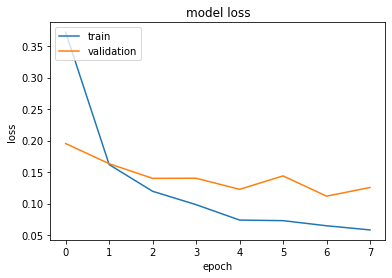

In [21]:
plt.plot(graph.history['loss'])
plt.plot(graph.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

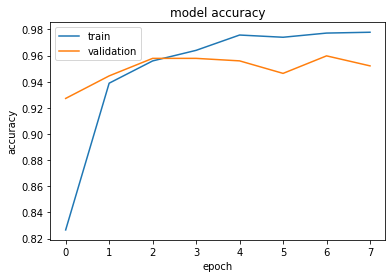

In [22]:
plt.plot(graph.history['accuracy'])
plt.plot(graph.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [23]:
model.save('lungEffect_prediction.model')

INFO:tensorflow:Assets written to: lungEffect_prediction.model\assets
